# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов и поучаствовать в соревновании на Kaggle!
Первым делом вам предстоит построить хороший бейзлайн, а дальше пытаться улучшать, соревнуясь с другими участниками.


Ссылка на соревнование: https://www.kaggle.com/c/avito-category-prediction/overview
Данные для домашнего задания можно скачать на странице соревнования.
Чтобы ваше участие было засчитано, убедитесь, что имя в Leaderboard имеет вид: «Имя Фамилия номер_группы».

Оценивание:

Домашнее задание оценивается как обычно. Баллы указаны напротив заданий.

За соревнование даются бонусные баллы следующим образом.
Если вы пересекли baseline_2 на приватном лидерборде, ваша оценка равна 

10 - 10 * (i - 1) / M

где M — количество студентов, принявших участие в соревновании;

i — место (начиная с 1) студента в приватном лидерборде среди всех таких студентов.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

* В течение 3 суток после окончания соревнования в соответствующее задание на anytask необходимо прислать код, воспроизводящий ответы для посылки, фигурирующей в приватном лидерборде. В случае отсутствия кода, воспроизводящего результат, в установленный срок студенту выставляется 0 в качестве оценки за соревнование. Если не оговорено иное, использовать любые внешние данные в соревнованиях '''запрещено'''. Под внешними данными понимаются размеченные данные, где разметка имеет прямое отношение к решаемой задаче. Грубо говоря, сборник текстов с википедии не считается внешними данными.


Мы будем работать с датасетом объявлений Avito. Нам предстоит по заголовку и тексту объявления предсказывать категорию объявления.

In [1]:
import pandas as pd

In [2]:
# train = pd.read_csv('avito-text-classification/train.csv')
# test = pd.read_csv('avito-text-classification/test.csv')

train_full = pd.read_csv('C:/Users/79152/Desktop/iad-intro-ds-master/2021/homeworks/hw06-text/train.csv')
test = pd.read_csv('C:/Users/79152/Desktop/iad-intro-ds-master/2021/homeworks/hw06-text/test.csv')

In [19]:
from copy import deepcopy

train = deepcopy(train_full[:100000])
train.head()

,title,description,Category_name,Category
0,"Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 год","Комплект ЭБУ (мозги, компьютер мотора, двигате...",Запчасти и аксессуары,10
1,Утюг утп 1000 ватт СССР 1987 год,Продам/\n Фото № 1-2 /\n /\nУтюг УТП 1000 ватт...,Бытовая техника,21
2,Возвму машину с выкупом,Возьму машину в аренду с последующим выкупом н...,Предложение услуг,114
3,Полусапожки,"полусапожки в отличном состоянии, один раз оде...","Одежда, обувь, аксессуары",27
4,Босоножки кожаные,"Кожаные(натур) босоножки Karlo Pasolini, 40 рр...","Одежда, обувь, аксессуары",27


## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [5]:
#train_full.isnull().any().any() # в тренировочных данных присутствуют пропуски

In [7]:
#train_full.isnull().sum() # а именно, в столбце description

In [8]:
#train_full['description'] = train['description'].fillna('') # заполним их пустой строкой

In [10]:
#train_full.isnull().any().any() # проверим, не осталось ли пропусков

In [20]:
train.isnull().any().any() # в первых 100000 элементах тренировочных данных пропуски отсутствуют

False

In [12]:
test.isnull().any().any() # в тестовой выборке пропуски есть

True

In [13]:
test.isnull().sum() # в столбце description

title          0
description    1
itemid         0
dtype: int64

In [14]:
test['description'] = test['description'].fillna('')

In [15]:
test.isnull().any().any() # в тестовой выборке не осталось пропусков

False

## Задание 2 (0.5 балла)
Сконкатенируйте заголовок и описание в единую строку и поместите результат в отдельный столбец. Таким образом мы будет работать с одним текстом, а не с двумя.

In [21]:
train['title&description'] = train['title'].str.cat(train['description'], sep =' ')

In [22]:
train.head()

,title,description,Category_name,Category,title&description
0,"Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 год","Комплект ЭБУ (мозги, компьютер мотора, двигате...",Запчасти и аксессуары,10,"Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 ..."
1,Утюг утп 1000 ватт СССР 1987 год,Продам/\n Фото № 1-2 /\n /\nУтюг УТП 1000 ватт...,Бытовая техника,21,Утюг утп 1000 ватт СССР 1987 год Продам/\n Фот...
2,Возвму машину с выкупом,Возьму машину в аренду с последующим выкупом н...,Предложение услуг,114,Возвму машину с выкупом Возьму машину в аренду...
3,Полусапожки,"полусапожки в отличном состоянии, один раз оде...","Одежда, обувь, аксессуары",27,"Полусапожки полусапожки в отличном состоянии, ..."
4,Босоножки кожаные,"Кожаные(натур) босоножки Karlo Pasolini, 40 рр...","Одежда, обувь, аксессуары",27,Босоножки кожаные Кожаные(натур) босоножки Kar...


In [23]:
train.shape

(100000, 5)

In [26]:
# можно также использовать такой вариант

# train['title&description'] = train[['title', 'description']].apply(lambda x: ' '.join(x), axis = 1)
# train.head()

## Задание 3 (0.5 балла)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Сколько всего уникальных классов необходимо предсказать?
2. Постройте столбчатую диаграмму распределения по классам. Нормализуйте график, чтобы видеть доли, а не абсолютные значения.
3. На сколько большой дисбаланс? Какой класс имеет самую большую долю в выборке (укажите класс и долю), какой класс наименьшую (укажите класс и долю).

In [27]:
# 1

print(f"Всего уникальных классов: {train['Category'].value_counts().count()}")

Всего уникальных классов: 50


Populating the interactive namespace from numpy and matplotlib


c:\users\79152\appdata\local\programs\python\python38\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +
c:\users\79152\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


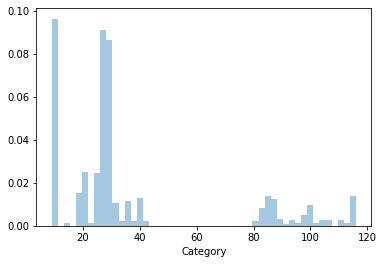

In [28]:
# 2

from matplotlib import pyplot as plt
import seaborn as sns
%pylab inline

sns.distplot(train['Category'], kde=False, norm_hist=True) # norm_hist=True нормализует график
plt.show()

In [30]:
# 3

print(train['Category'].value_counts())
#print(np.where(max(train['Category'].value_counts())))
print(f'Большой дисбаланс классов в выборке. \nКласс с самой большой долей  в выборке: {27}, его доля: {18066 / train.shape[0]}. \nКласс с самой маленькой долей  в выборке: {86}, его доля: {3 / train.shape[0]}')

27     18066
10     17418
29     13540
30      4975
20      3661
24      3462
19      3285
9       3060
114     2870
84      2659
36      2425
39      2015
32      1933
88      1714
21      1673
101     1616
28      1400
83      1384
25      1127
87       985
40       741
26       635
111      626
105      617
97       598
106      530
42       521
38       468
98       458
99       440
34       437
81       431
82       387
31       367
90       331
89       320
94       319
85       314
14       307
96       306
112      293
23       292
102      273
93       258
11       121
92       121
116       78
91        76
33        64
86         3
Name: Category, dtype: int64
Большой дисбаланс классов в выборке. 
Класс с самой большой долей  в выборке: 27, его доля: 0.18066. 
Класс с самой маленькой долей  в выборке: 86, его доля: 3e-05


## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью. Для test части нам неизвестны истинные значения, и они понадобятся только тогда, когда мы будем отправлять решение на Kaggle.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?


In [160]:
ads = train['title&description']

In [161]:
from sklearn.feature_extraction.text import CountVectorizer

cnt_vec = CountVectorizer()
bow = cnt_vec.fit_transform(ads)

In [162]:
bow.shape # размер полученной матрицы

(100000, 230691)

## Задание 5 (0.5 балла)

В предыдущем пункте у вас должная была получится очень большая матрица. Это не дело.
Если вы взгляните на текст, то увидете, что там есть множество специальных символов.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле _vocabulary инстанса этого класса.

1. Найдите в этом словаре все слова, которые начинаются на цифру. Сколько таких слов нашлось?

2. Найдите все слова, которые начинаются на символы пунктуации. Сколько таких слов нашлось? 

In [163]:
list(cnt_vec.vocabulary_.items())[:25] #  словарь, который получился в результате построения CountVectorizer

[('эбу', 227304),
 ('renault', 64163),
 ('nissan', 59437),
 ('dci', 43265),
 ('delphi', 43444),
 ('2001', 10185),
 ('2008', 10239),
 ('год', 100370),
 ('комплект', 127119),
 ('мозги', 142380),
 ('компьютер', 127318),
 ('мотора', 143404),
 ('двигателя', 103430),
 ('коммутатор', 126897),
 ('электронный', 228482),
 ('блок', 85152),
 ('управления', 214677),
 ('двигателем', 103414),
 ('для', 106634),
 ('рено', 188084),
 ('kangoo', 53129),
 ('канго', 121850),
 ('кангу', 121851),
 ('меган', 139159),
 ('сценик', 205011)]

In [164]:
# все слова, которые начинаются на цифру

words_with_first_digit = [couple[0] for couple in list(cnt_vec.vocabulary_.items()) if couple[0][0].isdigit()]

In [165]:
words_with_first_digit

['2001',
 '2008',
 '1000',
 '1987',
 '350',
 '405',
 '450',
 '10',
 '40',
 '20',
 '42',
 '44',
 '2000',
 '2006',
 '27808641',
 '14',
 '500',
 '00',
 '30',
 '39',
 '2012',
 '43018jn00a',
 '3744',
 '2019',
 '29',
 '2019г',
 '05',
 '59',
 '15',
 '000',
 '18',
 '4000',
 '150',
 '2010',
 '2017г',
 '60',
 '25',
 '40000',
 '46',
 '48',
 '200',
 '100',
 '3000',
 '35',
 '1866',
 '1880',
 '250',
 '2009',
 '3500',
 '1855',
 '1881',
 '1876',
 '1878',
 '1872',
 '50',
 '1918',
 '1919',
 '1921',
 '1922',
 '1923',
 '1924',
 '1925',
 '1926',
 '1928',
 '1932',
 '1934',
 '1937',
 '1938',
 '1947',
 '1957',
 '7000',
 '1769',
 '120',
 '12',
 '55',
 '2x34',
 '9x23',
 '2100',
 '65',
 '3x45',
 '3x26',
 '2700',
 '75',
 '3x53',
 '9x30',
 '3100',
 '625zz',
 '80025',
 '5x16x5мм',
 '3д',
 '70шт',
 '86',
 '92',
 '999',
 '150мм',
 '5т',
 '56k',
 '03',
 '09',
 '2003',
 '0012027',
 '21',
 '12квт',
 '14х23см',
 '171',
 '58',
 '109',
 '81',
 '34',
 '22',
 '2002',
 '074906461b',
 '4394872',
 '124',
 '7911g',
 '7912g',
 '1

In [174]:
print(f'{len(words_with_first_digit)} таких слов.')

33400 таких слов.


In [173]:
# все слова, которые начинаются на цифру, но дальше идут буквы

words_with_first_digit_2 = [couple[0] for couple in list(cnt_vec.vocabulary_.items()) if couple[0][0].isdigit() and 
                            couple[0][1:].isalpha()]
words_with_first_digit_2

['3д',
 '5т',
 '1z',
 '9лайт',
 '1шт',
 '2метра',
 '3шт',
 '1метру',
 '5мм',
 '3я',
 '5см',
 '6шт',
 '4d',
 '2тыс',
 '5ст',
 '2шт',
 '4л',
 '2полукомбинезона',
 '3d',
 '1го',
 '4g',
 '4a',
 '6ст',
 '2х',
 '5zigen',
 '8l',
 '4пары',
 '5литб',
 '7мм',
 '5мин',
 '3ч',
 '5ч',
 '9mm',
 '1штука',
 '8бар',
 '5d',
 '9g',
 '1kz',
 '5месяца',
 '2nz',
 '5м',
 '7б',
 '8gb',
 '4шт',
 '1t',
 '4k',
 '2gb',
 '1gb',
 '8л',
 '6s',
 '7тыс',
 '3гб',
 '2г',
 '2wd',
 '2серых',
 '4к',
 '5кг',
 '2ядра',
 '4gb',
 '8мм',
 '1wh',
 '2м',
 '3zzfe',
 '4б',
 '4e',
 '4h',
 '2l',
 '5р',
 '4cfg',
 '2т',
 '2а',
 '3мес',
 '2года',
 '7см',
 '5шт',
 '3литра',
 '7l',
 '4l',
 '8u',
 '1ком',
 '2в',
 '7мммакс',
 '4штуки',
 '5a',
 '5доставка',
 '7м',
 '1b',
 '3х',
 '1сентября',
 '2мм',
 '1m',
 '1тб',
 '1nz',
 '9га',
 '1га',
 '3см',
 '7а',
 '4x',
 '4э',
 '5мес',
 '2месяца',
 '5месяцев',
 '5x',
 '5na',
 '8см',
 '6см',
 '4д',
 '3р',
 '7r',
 '0ам',
 '0am',
 '3мм',
 '7a',
 '3м',
 '3pommes',
 '3чел',
 '4matic',
 '1см',
 '0td',
 '1u',

In [175]:
print(f'{len(words_with_first_digit_2)} таких слов.')

2155 таких слов.


In [176]:
from string import punctuation

# все слова, которые начинаются на символы пунктуации
punct_marks = list(punctuation)

words_with_first_punct = [couple[0] for couple in list(cnt_vec.vocabulary_.items()) if couple[0][0] in punct_marks]

In [177]:
words_with_first_punct

['____________________________________________________',
 '______________________________________________________',
 '____________________________________________________________',
 '________________________________________________________',
 '_______________________________________________________',
 '______________________',
 '__основы',
 '__изучение',
 '__импровизация',
 '__жанровые',
 '___________________________________________',
 '__________________',
 '______________________________________________',
 '_____________________________________________________',
 '________________________________',
 '__________________________________________________',
 '________________________',
 '_________________________',
 '__________________________',
 '___________________________',
 '___________________________________________________',
 '________________________________________________',
 '__________________________________',
 '_______________________________________________________________',

In [178]:
print(f'{len(words_with_first_punct)} таких слов.')

168 таких слов.


## Задание 6 (2.5 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно: 

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью word_tokenizer из пакета nltk
2. Удалит все токены содержащие числа и пунктуацию
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords('russian')
4. Проведет стемминг с помощью SnowballStemmer

Продемонстрируйте работу вашей функии на самом первом описании товара в датасете.

Важно: так как функию будет необходимо запускать на большом корпусе, подумайте об эффективной реализации. Постарайтесь решить задачу в минимальное количество циклов и копирований.

Референсная реализация на компьютере автора работала 230 секунд на 100к строчек.

In [ ]:
# CountVectorizer также имеет следующие интересные параметры: 
# lowercasebool: default=True
# tokenizer: default=None
# stop_wordsstring: {‘english’}, list, default=None

In [81]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [182]:
# ads = train['title&description']

In [82]:
stemmer = SnowballStemmer('russian')

In [184]:
def MyTokenizer(ads):
    #ads = list(map(str.lower, ads)) # в случае списка строк, но здесь это не нужно
    
    stop = stopwords.words('russian')
    ads_tokenized = [' '.join([stemmer.stem(w) for w in word_tokenize(ad) if w.isalpha() and 
                               w not in stop]) for ad in ads.str.lower()]
    return ads_tokenized

In [185]:
MyTokenizer(pd.Series(ads[0]))

['эб renault nissan dci delphi год комплект эб мозг компьютер мотор двигател коммутатор электрон блок управлен двигател компьютер мотор рен kangoo канг канг мега сценик laguna лагун clio кли nissan micra нисса микр друг рен нисса дизел топливн аппаратур делф оригина отличн состоян проверен гарант запчаст предоставля гарант возможн установк подробн раздел компан дорож сво репутац торгу легальн контрактн запчаст дета налич таможен документ запчаст автомобил пробег росс отправля друг регион таможен союз транспортн компан наложн платеж']

In [186]:
MyTokenizer(ads[:2])

['эб renault nissan dci delphi год комплект эб мозг компьютер мотор двигател коммутатор электрон блок управлен двигател компьютер мотор рен kangoo канг канг мега сценик laguna лагун clio кли nissan micra нисса микр друг рен нисса дизел топливн аппаратур делф оригина отличн состоян проверен гарант запчаст предоставля гарант возможн установк подробн раздел компан дорож сво репутац торгу легальн контрактн запчаст дета налич таможен документ запчаст автомобил пробег росс отправля друг регион таможен союз транспортн компан наложн платеж',
 'утюг утп ватт ссср год фот утюг утп ватт ссср рабоч состоян фот утюг ватт ссср рабоч состоян фот утюг ватт ссср руб рабоч состоян фот утюг ватт ссср руб рабоч состоян фот утюг delta руб рабоч личн встреч отправл фот утюг ватт ссср рабоч личн встреч отправл почт']

In [115]:
%timeit
MyTokenizer(ads)

['эб renault nissan dci delphi год комплект эб мозг компьютер мотор двигател коммутатор электрон блок управлен двигател компьютер мотор рен kangoo канг канг мега сценик laguna лагун clio кли nissan micra нисса микр друг рен нисса дизел топливн аппаратур делф оригина отличн состоян проверен гарант запчаст предоставля гарант возможн установк подробн раздел компан дорож сво репутац торгу легальн контрактн запчаст дета налич таможен документ запчаст автомобил пробег росс отправля друг регион таможен союз транспортн компан наложн платеж',
 'утюг утп ватт ссср год фот утюг утп ватт ссср рабоч состоян фот утюг ватт ссср рабоч состоян фот утюг ватт ссср руб рабоч состоян фот утюг ватт ссср руб рабоч состоян фот утюг delta руб рабоч личн встреч отправл фот утюг ватт ссср рабоч личн встреч отправл почт',
 'возвм машин выкуп возьм машин аренд послед выкуп ког возможн зада машин пиш сюд звонок мог услыша',
 'полусапожк полусапожк отличн состоян одева натуральн мех',
 'босоножк кожан кожан натур бо

## Задание 7 (1 балл)

1. Возьмите случайные 500к строк из датасета. Постройте по ним CountVectorizer с применением вашего токенизатора.
2. Разбейте полученную матрицу на train, test в отношении 4 к 1. Не забудьте про target переменную.
3. Обучите SGDClassifier на полученной выборке.
4. Посчитайте метрику accuracy

In [119]:
train500 = deepcopy(train_full.sample(500000)) # случайные 500к строк из датасета
train500.head()

,title,description,Category_name,Category
3941510,"Комната 13 м² в 5-к, 14/16 эт.","Сдается комната для 1 человека, для пары (1400...",Комнаты,23
3532154,Мопед delta classic 110(50) дельта + шлем,"Адрес: Санкт-Петербург, Кржижановского 14 к 1 ...",Мотоциклы и мототехника,14
1946330,"Футболка-поло Outventure, р.140","Футболка-поло, р. 140. Б/у, в очень хорошем со...",Детская одежда и обувь,29
707417,Продаю Часы zenith Торга Нет,Продаю Часы ZENITH Оригинал б.у Изготовлены из...,Часы и украшения,28
2906151,Стол,Дерево-шпон.,Мебель и интерьер,20


In [139]:
train500[['title', 'description']].isnull().any().any() # фух, пропусков нет

False

In [120]:
train500['title&description'] = train500['title'].str.cat(train500['description'], sep =' ')
train500.head()

,title,description,Category_name,Category,title&description
3941510,"Комната 13 м² в 5-к, 14/16 эт.","Сдается комната для 1 человека, для пары (1400...",Комнаты,23,"Комната 13 м² в 5-к, 14/16 эт. Сдается комната..."
3532154,Мопед delta classic 110(50) дельта + шлем,"Адрес: Санкт-Петербург, Кржижановского 14 к 1 ...",Мотоциклы и мототехника,14,Мопед delta classic 110(50) дельта + шлем Адре...
1946330,"Футболка-поло Outventure, р.140","Футболка-поло, р. 140. Б/у, в очень хорошем со...",Детская одежда и обувь,29,"Футболка-поло Outventure, р.140 Футболка-поло,..."
707417,Продаю Часы zenith Торга Нет,Продаю Часы ZENITH Оригинал б.у Изготовлены из...,Часы и украшения,28,Продаю Часы zenith Торга Нет Продаю Часы ZENIT...
2906151,Стол,Дерево-шпон.,Мебель и интерьер,20,Стол Дерево-шпон.


In [122]:
train500.shape

(500000, 5)

In [124]:
train500_tokenized = MyTokenizer(train500['title&description'])

In [125]:
train500_tokenized

['комнат эт сдает комнат человек пар длительн срок желательн куря чистоплотн животн комнат ремонт метр ул дыбенк мин пешк транспорт автобус трамва минут благоустроен район все необходим инфраструктур торгов комплекс тренажерн зал церков универс эт шагов доступн залог обсуд личн вопрос звон телефон ответ светла собственник',
 'мопед delta classic дельт шлем адрес кржижановск км кад съезд беспроцентн рассрочк месяц техник перв взнос нашл дешевл сдела цен цен город огромн ассортимент мототехник нашл дешевл товар налич ждат нужн работа ежедневн обед площад магазин кв метр минут пешк метр минут кад съезд пр косыгин бесплатн доставк шлем подарок всем отправк регион все рф территор таможен продаж кред лет оформлен наш сайт магазин ежедневн паспорт рф справок поручител легендарн мопед дельт сочета характеристик мопед альф имеет легк вес двигател тактн рабоч обь максимальн скорост колес систем запуск переключен скорост тип тормоз максимальн нагрузк дополнительн внедорожн мопед дельт отличн выбо

In [126]:
cnt_vec500 = CountVectorizer() # CountVectorizer с применением нашего токенизатора
bow500 = cnt_vec500.fit_transform(train500_tokenized)

In [127]:
from sklearn.preprocessing import MaxAbsScaler

scaler500 = MaxAbsScaler()
bow500 = scaler500.fit_transform(bow500)

In [128]:
bow500.shape

(500000, 186338)

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [137]:
# разобъём полученную матрицу на train, test в отношении 4 к 1
x_train, x_test, y_train, y_test = train_test_split(bow500, train500['Category'], test_size=0.2, random_state=13)

In [140]:
from sklearn.linear_model import SGDClassifier

In [141]:
# обучим SGDClassifier на полученной выборке
clf = SGDClassifier(max_iter=200, random_state=42)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

# посчитаем метрику accuracy
print(accuracy_score(y_pred, y_test))

0.80367


## Задание 8 (1 балл)

1. Повторите 7 задание, но с tf-idf векторизатором. Как изменилось качество.
2. Мы можем еще сильнее уменьшить размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?


In [142]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec500 = TfidfVectorizer()
bow500_2 = tfidf_vec500.fit_transform(train500_tokenized)

In [143]:
scaler500_2 = MaxAbsScaler()
bow500_2 = scaler500_2.fit_transform(bow500_2)

In [145]:
bow500_2.shape

(500000, 186338)

In [144]:
x_train, x_test, y_train, y_test = train_test_split(bow500_2, train500['Category'], test_size=0.2, random_state=13)

In [146]:
# обучим SGDClassifier на полученной выборке
clf = SGDClassifier(max_iter=200, random_state=42)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

# посчитаем метрику accuracy
print(accuracy_score(y_pred, y_test))

0.84749


In [147]:
print(f'Как изменилось качество: {0.84749 - 0.80367}')

Как изменилось качество: 0.04381999999999997


In [148]:
tfidf_vec500 = TfidfVectorizer(max_df=0.9) # ограничим максимальное значение
bow500_2 = tfidf_vec500.fit_transform(train500_tokenized)

scaler500_2 = MaxAbsScaler()
bow500_2 = scaler500_2.fit_transform(bow500_2)

In [203]:
bow_test = tfidf_vec500.transform(test_tokenized) # 10 задание

In [204]:
bow_test = scaler500_2.transform(bow_test) # 10 задание

In [149]:
bow500_2.shape

(500000, 186338)

In [205]:
x_train, x_test, y_train, y_test = train_test_split(bow500_2, train500['Category'], test_size=0.2, random_state=13)


In [206]:
# обучим SGDClassifier на полученной выборке
clf = SGDClassifier(max_iter=200, random_state=42)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

# посчитаем метрику accuracy
print(accuracy_score(y_pred, y_test))


0.84749


In [152]:
print(f'Как изменилось качество: {0.84749 - 0.84749}')

Как изменилось качество: 0.0


In [207]:
test_pred = clf.predict(bow_test) # 10 задание

## Задание 9 (1 балл)
Еще один популяпный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 7 с HashingVectorizer, укажите количество фичей равное 30000.
2. Какой из трех подходов показал самый высокий результат?

In [153]:
from sklearn.feature_extraction.text import HashingVectorizer

In [154]:
hs_vec500 = HashingVectorizer(n_features=30000) # HashingVectorizer с применением нашего токенизатора
bow500_3 = hs_vec500.fit_transform(train500_tokenized)

scaler500_3 = MaxAbsScaler()
bow500_3 = scaler500_3.fit_transform(bow500_3)

In [155]:
bow500_3.shape

(500000, 30000)

In [157]:
# разобъём полученную матрицу на train, test в отношении 4 к 1
x_train, x_test, y_train, y_test = train_test_split(bow500_3, train500['Category'], test_size=0.2, random_state=13)

In [158]:
# обучим SGDClassifier на полученной выборке
clf = SGDClassifier(max_iter=200, random_state=42)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

# посчитаем метрику accuracy
print(accuracy_score(y_pred, y_test))

0.83308


In [159]:
print(f'Как изменилось качество: {0.83308 - 0.84749}')

Как изменилось качество: -0.014409999999999923


In [ ]:
# Какой из трех подходов показал самый высокий результат?

# Обе вариации подхода с tf-idf векторизатором (задания 8.1 и 8.2) показали лучший результат при решении задачи
# на исходных данных.

## Задание 10 (1.5 балла)

Пришло время выйти в мир. Отправляйтесь на Kaggle Inclass и сделайте первую посылку. Там вы найдете инструкцию как сформировать файл с предсказаниями и отправить его.

In [193]:
test = pd.read_csv('C:/Users/79152/Desktop/iad-intro-ds-master/2021/homeworks/hw06-text/test.csv')

In [199]:
test.head()

,title,description,itemid
0,Мастерка,Мастерка фирмы форвард. Белого цвета. В идеаль...,1778449823
1,Зимние сапоги,"Продаю зимние сапоги, в хорошем состоянии, все...",1677656962
2,Видеонаблюдение 8 камер,В комплект Atis AMD-2MIR-8kit входит: /\n1. Ку...,1758182804
3,Запчасти для GLE,Запчасти GLE,1689811299
4,Бластер nerf,Состояние 5+/\nПродаю потому что не нужен/\n18...,1804706240


In [196]:
test.isnull().sum()

title          0
description    1
itemid         0
dtype: int64

In [197]:
test['description'] = test['description'].fillna(' ')

In [198]:
test.isnull().sum()

title          0
description    0
itemid         0
dtype: int64

In [200]:
test['title&description'] = test['title'].str.cat(test['description'], sep =' ')
test = test.rename({'itemid': 'Id'}, axis=1)
test.head()

,title,description,Id,title&description
0,Мастерка,Мастерка фирмы форвард. Белого цвета. В идеаль...,1778449823,Мастерка Мастерка фирмы форвард. Белого цвета....
1,Зимние сапоги,"Продаю зимние сапоги, в хорошем состоянии, все...",1677656962,"Зимние сапоги Продаю зимние сапоги, в хорошем ..."
2,Видеонаблюдение 8 камер,В комплект Atis AMD-2MIR-8kit входит: /\n1. Ку...,1758182804,Видеонаблюдение 8 камер В комплект Atis AMD-2M...
3,Запчасти для GLE,Запчасти GLE,1689811299,Запчасти для GLE Запчасти GLE
4,Бластер nerf,Состояние 5+/\nПродаю потому что не нужен/\n18...,1804706240,Бластер nerf Состояние 5+/\nПродаю потому что ...


In [201]:
test.shape

(1411348, 4)

In [202]:
test_tokenized = MyTokenizer(test['title&description'])
test_tokenized

['мастерк мастерк фирм форвард бел цвет идеальн состоян',
 'зимн сапог прода зимн сапог хорош состоян страз внутр хорош мех очен тепл размер',
 'видеонаблюден камер комплект atis вход купольн внутрен видеокамер разрешен угол обзор градус ночн подсветк метр шт гибридн видеорегистратор канал шт блок питан шт разь bnc винт шт разь bnc клеммн колодк шт штекер питан шт гнезд питан дополнительн опц жестк диск тб wd purple рубл установк настройк подарок кабел комбинирова п установк комплект видеонаблюден стоимост комплект видеонаблюден камер камер камер камер камер камер камер покупк комплект магазин установк жестк диск настройк видеорегистратор настройк удален доступ телефон планшет эт ещ все оставьт отз наш магазин получ скидк оборудован покупк наличн расчет цен объявлен указа скидк забудьт напомн сохран эт объявлен избра потеря эт действительн выгодн гарант оборудован отправля настроен комплект регион наличн безналичн расчет ндс звон',
 'запчаст gle запчаст gle',
 'бластер nerf состоян про

In [209]:
test_pred = pd.DataFrame(test_pred, columns=['Category'])

In [211]:
to_kaggle = pd.concat([test.Id, test_pred], axis=1)

In [212]:
to_kaggle.head()

,Id,Category
0,1778449823,29
1,1677656962,27
2,1758182804,32
3,1689811299,10
4,1804706240,30


In [216]:
to_kaggle.to_csv(path_or_buf='C:/Users/79152/Desktop/iad-intro-ds-master/2021/homeworks/hw06-text/to_kaggle.csv', index=False)